# Hoja de Trabajo 6
## Regresión Logística
---
**Integrantes**
- Maria Marta Ramirez Gil
- Gustavo Andres Gonzalez Pineda 
- Diego Alberto Leiva Pérez 
- José Pablo Orellana Orellana 
- Gabriel Estuardo García Donis 
---

## Análisis Exploratorio

### Comprensión Inicial

**Importar Librerias**

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar el Dataset**

In [2]:
data = pd.read_csv("weatherAUS.csv")

**Información general del dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Estructura del dataset**

In [4]:
print(f"El dataset contiente: {data.shape[0]} observaciones y {data.shape[1]} variables")

El dataset contiente: 145460 observaciones y 23 variables


In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Identificación de Variables

**Variables categóricas**

In [6]:
# Encontrar variables categoricas
categorical = data.select_dtypes(include=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables categoricas en el dataset:")
for column in categorical:
    print(f"- {column}")


# Contar las variables categoricas binarias
binary_categorical = [col for col in categorical if data[col].nunique() == 2]

print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset:")
for column in binary_categorical:
    print(f"- {column}")

Hay 7 variables categoricas en el dataset:
- Date
- Location
- WindGustDir
- WindDir9am
- WindDir3pm
- RainToday
- RainTomorrow

Hay 2 variables categoricas binarias en el dataset:
- RainToday
- RainTomorrow


**Frecuencia de valores categóricos**

In [7]:
for column in categorical:
    print(data[column].value_counts())
    print('\n', '-'*35, '\n')

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

 ----------------------------------- 

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale               

**Variables numéricas**

In [8]:
# Encontrar variables numericas
numerical = data.select_dtypes(exclude=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables numericas en el dataset:")
for column in numerical:
    print(f"- {column}")

Hay 7 variables numericas en el dataset:
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustSpeed
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm


**Variables identificadas**

- `Date`: Fecha de la observación.
- `Location`: Ubicación geográfica.
- `MinTemp`: Temperatura mínima del día en grados Celsius.
- `MaxTemp`: Temperatura máxima del día en grados Celsius.
- `Rainfall`: Cantidad de precipitación registrada en el día en milímetros.
- `Evaporation`: Tasa de evaporación del día en milímetros.
- `Sunshine`: Número de horas de sol durante el día.
- `WindGustDir`: Dirección de la ráfaga de viento más fuerte en 16 puntos cardinales.
- `WindGustSpeed`: Velocidad de la ráfaga de viento más fuerte en kilómetros por hora.
- `WindDir9am`: Dirección del viento a las 9 am en puntos cardinales.
- `WindDir3pm`: Dirección del viento a las 3 pm en puntos cardinales.
- `WindSpeed9am`: Velocidad del viento a las 9 am en kilómetros por hora.
- `WindSpeed3pm`: Velocidad del viento a las 3 pm en kilómetros por hora.
- `Humidity9am`: Humedad a las 9 am en porcentaje.
- `Humidity3pm`: Humedad a las 3 pm en porcentaje.
- `Pressure9am`: Presión atmosférica a las 9 am en hectopascales.
- `Pressure3pm`: Presión atmosférica a las 3 pm en hectopascales.
- `Cloud9am`: Porcentaje de cobertura nubosa a las 9 am en octavos.
- `Cloud3pm`: Porcentaje de cobertura nubosa a las 3 pm en octavos.
- `Temp9am`: Temperatura a las 9 am en grados Celsius.
- `Temp3pm`: Temperatura a las 3 pm en grados Celsius.
- `RainToday`: Indicador si llovió o no (Sí/No).
- `RainTomorrow`: Indicador si lloverá al día siguiente (Sí/No).

Nota: Un hectopascal es la unidad de presión del sistema internacional, equivalente a 100 pascales, utilizada en meteorología para expresar la presión atmosférica. (RAE, 2024)

RAE (2024). hectopascal | Diccionario de la lengua española. «Diccionario de la Lengua Española» - Edición del Tricentenario. https://dle.rae.es/hectopascal

**Renombrar columnas al español**

In [9]:
# Se cambian los nombres de las variables a español para facilitar su comprensión
new_column_names = {
    'Date': 'fecha',
    'Location': 'ubicacion',
    'MinTemp': 'temp_min',
    'MaxTemp': 'temp_max',
    'Rainfall': 'precipitacion',
    'Evaporation': 'evaporacion',
    'Sunshine': 'horas_sol',
    'WindGustDir': 'dir_rafaga_viento',
    'WindGustSpeed': 'vel_rafaga_viento',
    'WindDir9am': 'dir_viento_9am',
    'WindDir3pm': 'dir_viento_3pm',
    'WindSpeed9am': 'vel_viento_9am',
    'WindSpeed3pm': 'vel_viento_3pm',
    'Humidity9am': 'humedad_9am',
    'Humidity3pm': 'humedad_3pm',
    'Pressure9am': 'presion_9am',
    'Pressure3pm': 'presion_3pm',
    'Cloud9am': 'nubosidad_9am',
    'Cloud3pm': 'nubosidad_3pm',
    'Temp9am': 'temp_9am',
    'Temp3pm': 'temp_3pm',
    'RainToday': 'lluvia_hoy',
    'RainTomorrow': 'lluvia_manana'
}

data.rename(columns=new_column_names, inplace=True)

# Se obtienen las variables categoricas y numericas del dataset con los nuevos nombres
categorical = data.select_dtypes(include=['object']).columns.tolist()
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
binary_categorical = [col for col in categorical if data[col].nunique() == 2]

# Convertir la columna 'fecha' a tipo datetime
data['fecha'] = pd.to_datetime(data['fecha'])

# Verificar que se hayan realizado los cambios
data.head()


,fecha,ubicacion,temp_min,temp_max,precipitacion,evaporacion,horas_sol,dir_rafaga_viento,vel_rafaga_viento,dir_viento_9am,...,humedad_9am,humedad_3pm,presion_9am,presion_3pm,nubosidad_9am,nubosidad_3pm,temp_9am,temp_3pm,lluvia_hoy,lluvia_manana
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

In [10]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_categorical = data[categorical].isnull().mean() * 100
null_percentage_numeric = data[numerical].isnull().mean() * 100

print(f"Porcentaje de data faltante en variables categoricas:")
print( null_percentage_categorical.sort_values(ascending=False))
print('\n', '-'*35, '\n')
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))


Porcentaje de data faltante en variables categoricas:
dir_viento_9am       7.263853
dir_rafaga_viento    7.098859
dir_viento_3pm       2.906641
lluvia_manana        2.245978
lluvia_hoy           2.241853
fecha                0.000000
ubicacion            0.000000
dtype: float64

 ----------------------------------- 

Porcentaje de data faltante en variables numericas:
horas_sol            48.009762
evaporacion          43.166506
nubosidad_3pm        40.807095
nubosidad_9am        38.421559
presion_9am          10.356799
presion_3pm          10.331363
vel_rafaga_viento     7.055548
humedad_3pm           3.098446
temp_3pm              2.481094
precipitacion         2.241853
vel_viento_3pm        2.105046
humedad_9am           1.824557
vel_viento_9am        1.214767
temp_9am              1.214767
temp_min              1.020899
temp_max              0.866905
dtype: float64


**Visualizar la data faltante**

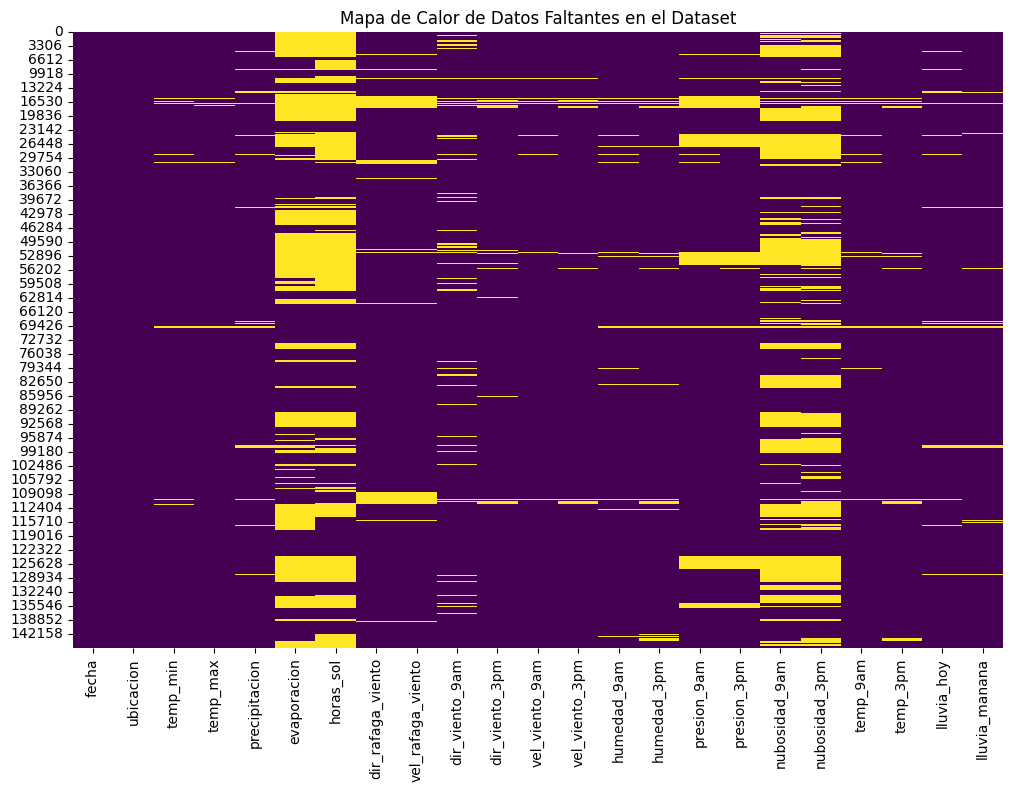

In [11]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

Se pueden observar que la mayor cantidad de valores faltantes se encuentra dentro de las variables numéricas, donde hay columnas como `horas_sol`, `evaporacion`, `nubosidad_3pm`, `nubosidad_9am` donde hay datos faltantes mayores al 40%.
Por lo tanto, es necesario realizar un análisis de importancia e impacto de estas y otras variables para poder determinar como manejar estos datos faltantes o nulos.

**Evaluación de impacto de eliminación de nulos**

In [12]:
# Eliminar filas con cualquier valor nulo
data_raw_clean = data.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_raw_clean.shape[0]
remaining_records_percentage = (remaining_records / data.shape[0]) * 100

print(f" Si se eliminacen todas las observaciones con valores nulos, \
      quedarian {remaining_records} registros, \
      {remaining_records_percentage:.2f}% de la data original")

 Si se eliminacen todas las observaciones con valores nulos,       quedarian 56420 registros,       38.79% de la data original


Esta claro que eliminar todos los registros nulos tiene un gran impacto sobre el dataset, dejando apenas un 38% de los datos originales, en consecuencia, se ha determinado que esta no es una acción viable para el análisis.

**Evaluación de correlación entre variables numéricas**

Se asumen que la variable objetivo sera la variable lluvia_manana, que servira para predecir si habra lluvia o no al dia siguiente. 
Por consiguiente es necesario codificarla como variable numérica para poder evaluar la correlación de las otras variables con esta.

In [13]:
# Se codifican las variables categoricas binarias
data['lluvia_hoy'] = data['lluvia_hoy'].map({'No': 0, 'Yes': 1})
data['lluvia_manana'] = data['lluvia_manana'].map({'No': 0, 'Yes': 1})

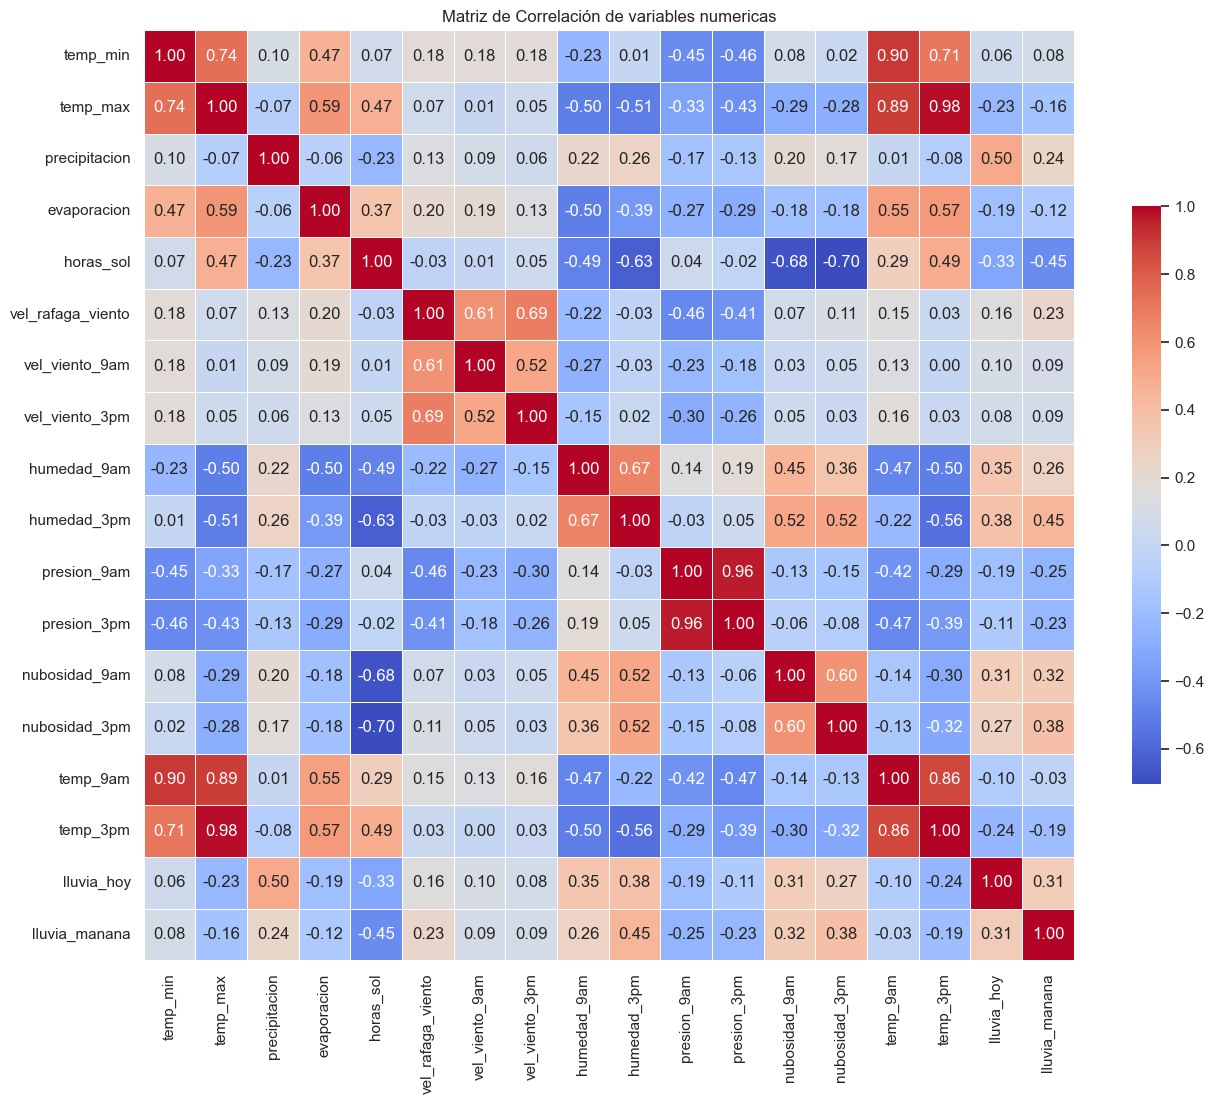

In [14]:
# Se evalua la correlacion entre las variables numericas para determinar si se pueden eliminar algunas de ellas
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
numerical.remove('fecha')

# Calcular la correlación entre las variables numéricas
correlation_matrix = data[numerical].corr()

# Configurar el estilo de los gráficos
sns.set_theme(style="white")

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlación de variables numericas')
plt.show()

Este gráfico de correlación muestra claramente que las variables problemáticas detectadas anteriormente tienen si mucho, una correlación ligeramente moderada con las variables objetivo de lluvia. Dado que imputar mas del 40% de los valores a estas variables puede llevar a un sesgo significativo, se concluye que la mejor opción es eliminar estas 4 variables (`horas_sol`, `evaporacion`, `nubosidad_3pm`, `nubosidad_9am`) del dataset.

Por otro lado para variables con un menor porcentaje de nulos (menos del 10%) se tienen en consideración métodos de imputación basados en la mediana o la media para variables continuas, o la moda para variables categóricas.

In [15]:
# Eliminar las variables con gran cantidad de nulos
data.drop(['evaporacion', 'horas_sol', 'nubosidad_9am', 'nubosidad_3pm'], axis=1, inplace=True)

**Imputación de valores**

In [16]:
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.tolist()

# Imputar con la moda para variables categóricas con 10% o menos de valores faltantes
for column in categorical:
    mode = data[column].mode()[0]
    data.fillna({column: mode}, inplace=True)

# Imputar con la mediana para variables numéricas con 10% o menos de valores faltantes
for column in numerical:
    median = data[column].median()
    data.fillna({column: median}, inplace=True)

In [17]:
# Verificar que ya no hay valores nulos
data.isnull().sum()

fecha                0
ubicacion            0
temp_min             0
temp_max             0
precipitacion        0
dir_rafaga_viento    0
vel_rafaga_viento    0
dir_viento_9am       0
dir_viento_3pm       0
vel_viento_9am       0
vel_viento_3pm       0
humedad_9am          0
humedad_3pm          0
presion_9am          0
presion_3pm          0
temp_9am             0
temp_3pm             0
lluvia_hoy           0
lluvia_manana        0
dtype: int64

#### Identificación y manejo de valores atípicos

Se aplicará el método de Tukey para identificar valores atípicos en las variables numéricas. El metodo indica que un valor es atípico cuando se encuentra a mas de 1.5 veces el rango intercuartilico  por encima del tercer cuartil o por debajo del primer cuartil.

Variables numéricas con posibles outliers:
temp_min
temp_max
precipitacion
vel_rafaga_viento
vel_viento_9am
vel_viento_3pm
humedad_9am
presion_9am
presion_3pm
temp_9am
temp_3pm
lluvia_hoy
lluvia_manana


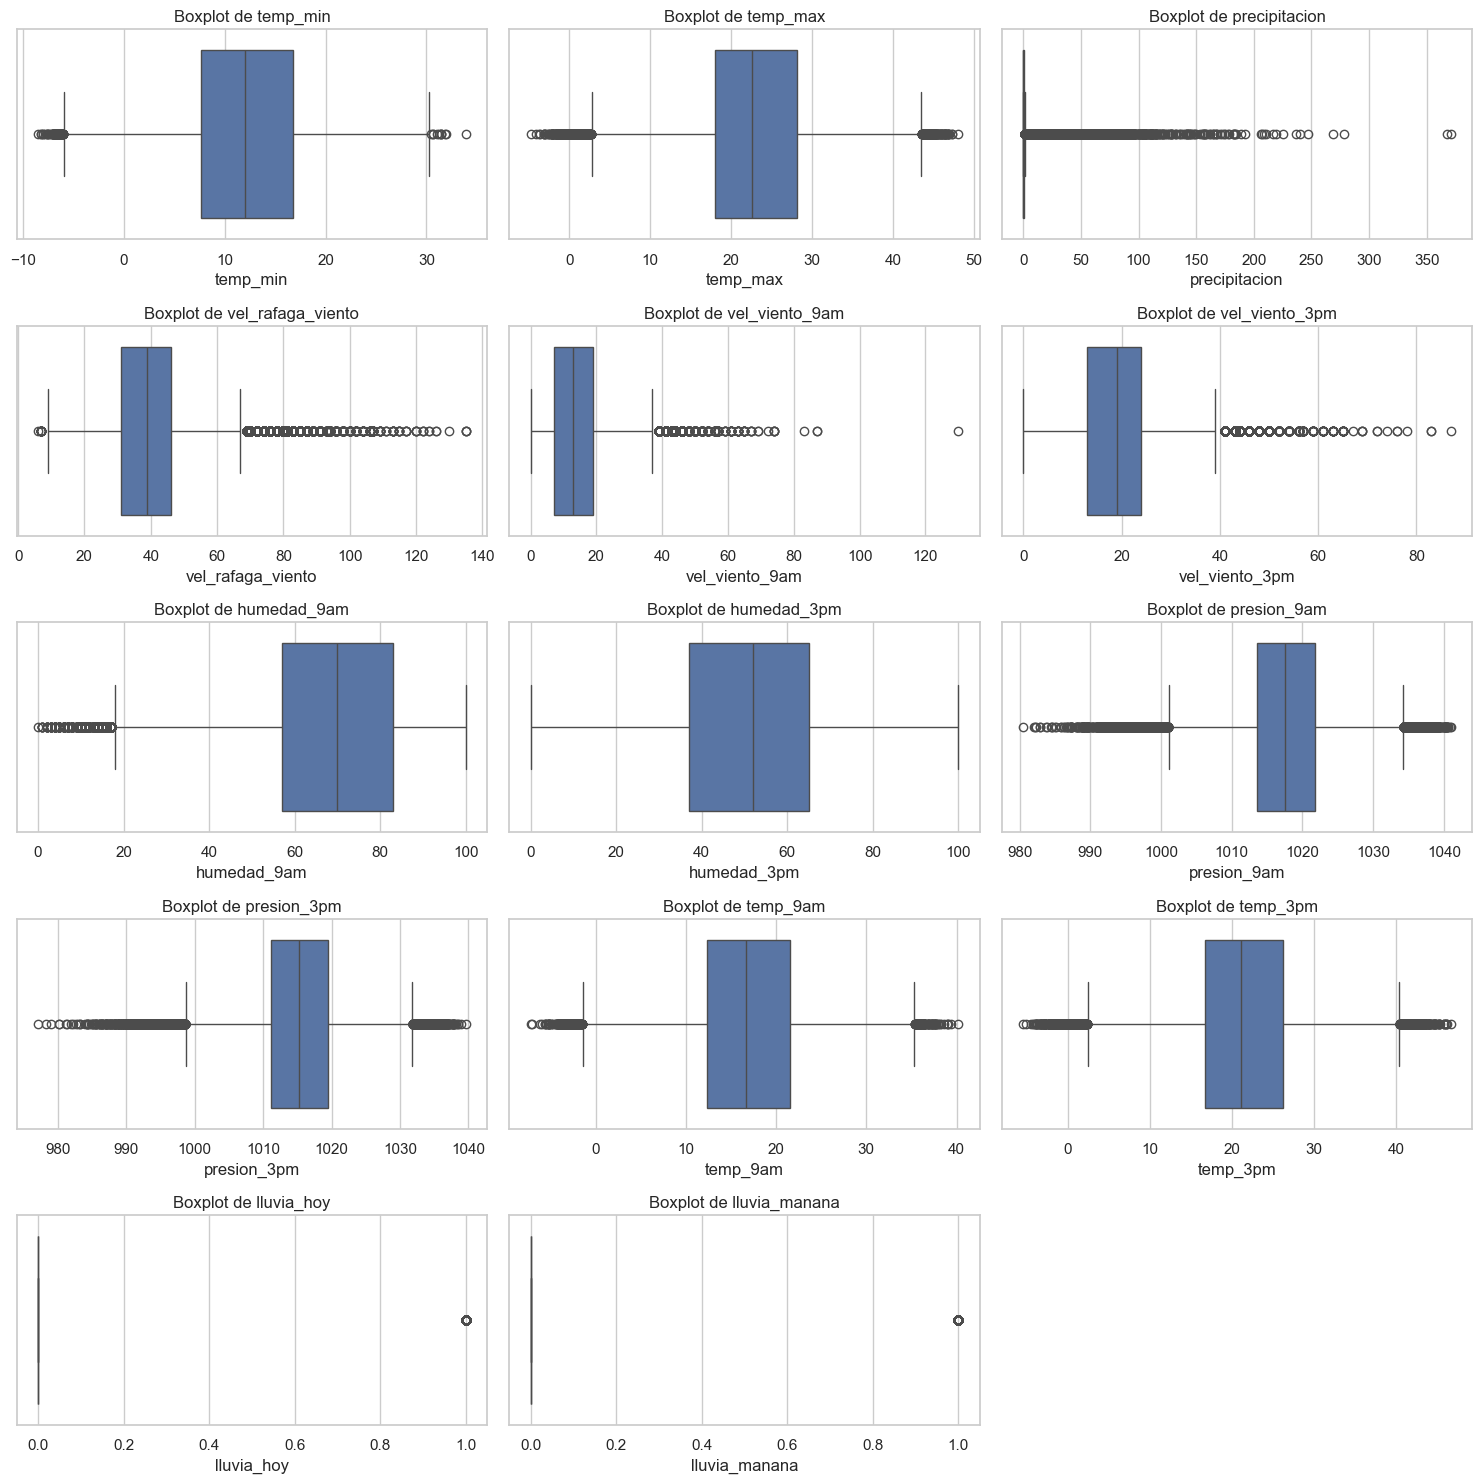

In [18]:
# Configurar estilo de los gráficos
sns.set_theme(style="whitegrid")

# Filtrar solo las columnas numéricas del conjunto de datos limpio
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Eliminar las columnas binarias de la lista
numerical_columns.drop(['lluvia_manana','lluvia_hoy'])

# Definir el tamaño de la figura para los subplots
plt.figure(figsize=(15, 15))

# Diccionario para almacenar los outliers
potential_outliers = {}

# Crear un boxplot para cada columna numérica
for index, col in enumerate(numerical_columns):
    # Seleccionar el subplot
    plt.subplot((len(numerical_columns) + 2) // 3, 3, index + 1)
    
    # Calcular Q1 y Q3
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar y almacenar posibles outliers
    potential_outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Crear el boxplot
    sns.boxplot(x=data[col], orient="h")
    plt.title(f"Boxplot de {col}")

# Mostrar las columnas numéricas que contienen outliers
print("Variables numéricas con posibles outliers:")
for col, data in potential_outliers.items():
    if not data.empty:
        print(col)

# Ajustar el layout de los subplots para evitar solapamientos
plt.tight_layout()
plt.show()

In [19]:
# Recorrer cada columna numérica para eliminar outliers
for col in numerical_columns:
    # Calcular el primer y tercer cuartil
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    # Definir límites para detectar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar los datos para eliminar los outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]